Enter file name: Faded.jpg


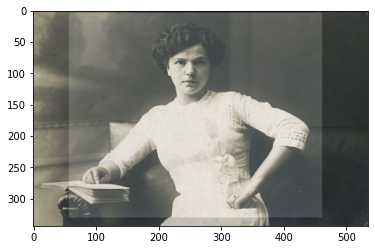

In [1]:
#Matthew Ennis C18477502
#My algorithm works as follows:
#The focus on the saturation channel since photos left out in the sun are usually desaturated
#After singling out the saturation, a threshold is found so that the damaged area can be selected
#Morphology is used to get a cleaner and better mask
#A border is also applied since the edge of the photo is guaranteed to be undamaged
#After that, the saturation is increased in the damaged area
#The damaged and undamaged sections are added back together
#This new improved saturation layer is combined with the original hue and value layers
#This is converted to grayscale and a gaussian blur is applied to smooth out any imperfections in the photo
#I realise the goal is to sharpen rather than blur but many photos have small scratches etc that would be better blurred imo

import cv2
from matplotlib import pyplot as plt
import numpy as np

filename = input("Enter file name: ")

original = cv2.imread(filename)

original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)
h, w, d = original.shape

plt.imshow(original);

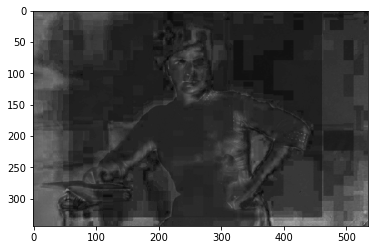

In [2]:
hsv = cv2.cvtColor(original, cv2.COLOR_RGB2HSV)
sat = hsv[:,:,1]

plt.imshow(sat, cmap="gray");

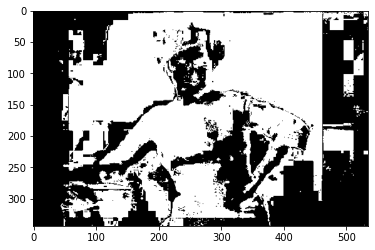

In [3]:
thresh = np.median(sat)

t, binsat = cv2.threshold(sat, thresh=thresh, maxval=255, type=cv2.THRESH_BINARY)

if binsat[0,0] == 255:
    binsat = cv2.bitwise_not(binsat)

plt.imshow(binsat, cmap="gray");

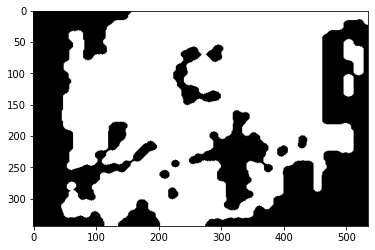

In [4]:
ellipse = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(h//25,h//25))

binsat = cv2.morphologyEx(binsat,cv2.MORPH_CLOSE,ellipse)
binsat = cv2.morphologyEx(binsat,cv2.MORPH_OPEN,ellipse)

plt.imshow(binsat, cmap="gray");

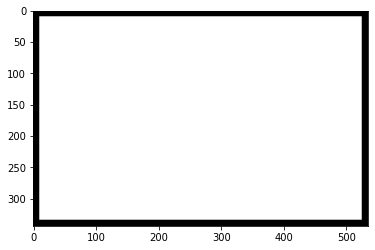

In [5]:
border = np.zeros((h,w), dtype='uint8')
border[10:-10,10:-10] = 255

plt.imshow(border, cmap="gray");

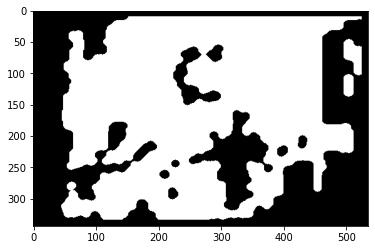

In [6]:
mask = cv2.bitwise_and(binsat,border)

plt.imshow(mask,cmap="gray");

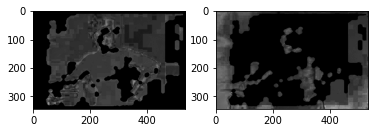

In [7]:
damaged = sat & mask
undamaged = sat & cv2.bitwise_not(mask)

plt.subplot(1,2,1)
plt.imshow(damaged,cmap="gray")

plt.subplot(1,2,2)
plt.imshow(undamaged,cmap="gray");

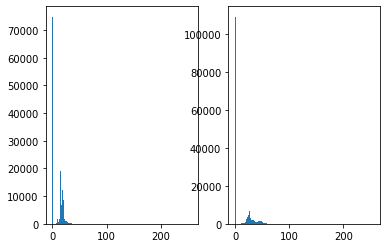

In [8]:
dgraph = damaged.ravel()
ugraph = undamaged.ravel()

plt.subplot(1,2,1)
plt.hist(dgraph,bins=256,range=[0,256])

plt.subplot(1,2,2)
plt.hist(ugraph,bins=256,range=[0,256]); 

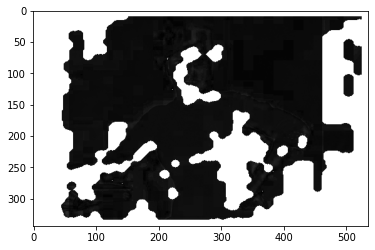

In [9]:
np.add(damaged,int(np.mean(damaged)-np.mean(undamaged)),out=damaged,casting="unsafe")

plt.imshow(damaged,cmap="gray");

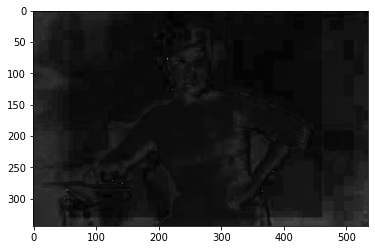

In [10]:
sat = damaged + undamaged

plt.imshow(sat, cmap="gray");

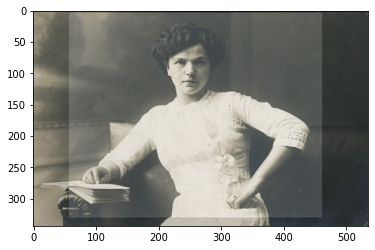

In [11]:
hue = hsv[:,:,0]
val = hsv[:,:,2]

new = cv2.merge([hue,sat,val])
new = cv2.cvtColor(new, cv2.COLOR_HSV2RGB)

plt.imshow(new);

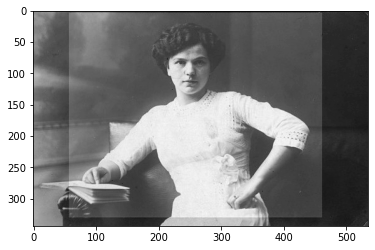

In [12]:
new = cv2.cvtColor(new, cv2.COLOR_RGB2GRAY)

plt.imshow(new,cmap="gray");

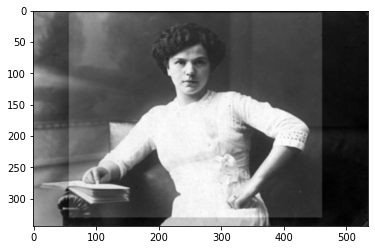

In [13]:
gaussian = np.array([[1,4,1],[4,7,4],[1,4,1]], dtype=float) / 27
new = cv2.filter2D(new, ddepth=-1, kernel=gaussian)

plt.imshow(new,cmap="gray");

In [14]:
cv2.imwrite("RESTORED"+filename, new)
print("Your new file can be found at RESTORED"+filename)

Your new file can be found at RESTOREDFaded.jpg
